In [15]:
import h5py, os
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
import pandas as pd

from dca import analysis
from dca import plotting
from dca import data_util

In [16]:
reload(data_util)
M1 = data_util.load_sabes_data('neural/indy_20160627_01.mat')

OSError: Unable to open file (unable to open file: name = 'neural/indy_20160627_01.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [11]:
reload(data_util)
HC = data_util.load_kording_paper_data('neural/example_data_hc.pickle')

In [12]:
reload(data_util)
weather = data_util.load_weather_data('weather/temperature.csv')

In [14]:
reload(data_util)
file = 'accel/sub_19.csv'
accel = data_util.load_accel_data(file)

FileNotFoundError: [Errno 2] File b'accel/sub_19.csv' does not exist: b'accel/sub_19.csv'

In [13]:
HC['neural'].shape

(27854, 55)

In [4]:
T_pi_vals = np.arange(1, 11)

dim_vals = np.array([5, 10, 15, 25])
accel_dims = np.array([3, 4, 5, 6])
temp_dims = np.array([3, 4, 5, 6])
hc_dims = np.array([10, 15, 25, 30])

offsets = np.array([0, 5, 10, 15])
accel_offsets = np.array([0, 3, 6, 9])

win = 3
n_cv = 5
n_init = 5

In [7]:
reload(analysis)
reload(plotting)

M1_results = analysis.run_analysis(M1['M1'], M1['cursor'], T_pi_vals, dim_vals=dim_vals, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

HC_results = analysis.run_analysis(HC['neural'], HC['loc'], T_pi_vals, dim_vals=hc_dims, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

weather_results = analysis.run_analysis(weather, weather, T_pi_vals, dim_vals=dim_vals, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

accel_results = analysis.run_analysis(accel, accel, T_pi_vals, dim_vals=accel_dims, offset_vals=accel_offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

fold 1 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 2 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 3 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 4 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 5 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 1 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
fold 2 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 3 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 4 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 5 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 1 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 2 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 3 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 4 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 5 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 1 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 2 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fold 3 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4
fol

In [10]:
np.savez('real_data.npz', M1_results=M1_results, HC_results=HC_results,
         weather_results=weather_results, accel_results=accel_results)

In [3]:
d = np.load('real_data.npz')
M1_results = d['M1_results']
HC_results = d['HC_results']
weather_results = d['weather_results']
accel_results = d['accel_results']

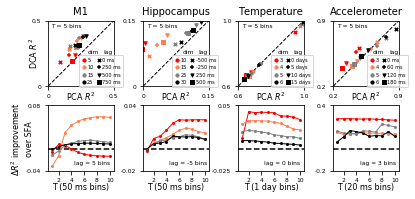

In [103]:
reload(plotting)
fig, axes = plotting.decoding_fix_axes(fig_width=5.5, fig_height=2.7,
                                       wpad_mid=.075, hpad_mid=.1,
                                       wpad_left=.09, wpad_right=.025,
                                       hpad_bot=.12)
loc='lower right'
bbox_to_anchor=(1.18, -.05)

plotting.scatter_r2_vals(M1_results, 4, dim_vals, offsets, T_pi_vals, min_val=0, max_val=.5,
                         ax=axes[0], title='M1', timestep_units='ms', timestep=50, loc=loc,
                         bbox_to_anchor=bbox_to_anchor)
plotting.plot_pi_vs_T(M1_results, T_pi_vals, dim_vals, offsets, offset_idx=1, min_max_val=.08,
                      ax=axes[4], legend=False, timestep_units='ms', timestep=50)

plotting.scatter_r2_vals(HC_results, 4, hc_dims, offsets, T_pi_vals, min_val=0, max_val=.15,
                         ax=axes[1], ylabel=False, title='Hippocampus',
                         timestep_units='ms', timestep=50, loc=loc,
                         bbox_to_anchor=bbox_to_anchor)
plotting.plot_pi_vs_T(HC_results, T_pi_vals, hc_dims, offsets, offset_idx=1, min_max_val=.04,
                      ax=axes[5], legend=False, ylabel=False, timestep_units='ms', timestep=50)

plotting.scatter_r2_vals(weather_results, 4, temp_dims, offsets, T_pi_vals, min_val=.6, max_val=1.,
                         ax=axes[2], ylabel=False, title='Temperature',
                        timestep_units='days', timestep=1, legend=True, loc=loc,
                         bbox_to_anchor=bbox_to_anchor)
plotting.plot_pi_vs_T(weather_results, T_pi_vals, temp_dims, offsets, offset_idx=0, min_max_val=.05,
                      ax=axes[6], legend=False, ylabel=False, timestep_units='day', timestep=1)

plotting.scatter_r2_vals(accel_results, 4, accel_dims, accel_offsets, T_pi_vals, min_val=.2, max_val=.9,
                         ax=axes[3], ylabel=False, title='Accelerometer',
                        timestep_units='ms', timestep=20,loc=loc,
                         bbox_to_anchor=bbox_to_anchor)
plotting.plot_pi_vs_T(accel_results, T_pi_vals, accel_dims, accel_offsets, offset_idx=1, min_max_val=.4,
                      ax=axes[7], legend=False, ylabel=False, timestep_units='ms', timestep=20)

#plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/real_data.pdf'), dpi=300)
#plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/real_data.png'), dpi=300)

# Neural Forcasting

In [5]:
reload(analysis)
reload(plotting)

M1_forcast_results = analysis.run_analysis(M1['M1'], M1['M1'], T_pi_vals, dim_vals=dim_vals, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

HC_forcast_results = analysis.run_analysis(HC['neural'], HC['neural'], T_pi_vals, dim_vals=hc_dims, offset_vals=offsets,
                                   num_cv_folds=n_cv, decoding_window=win, n_init=n_init, verbose=True)

fold 1 of 5
dim 1 of 4
dim 2 of 4
dim 3 of 4
dim 4 of 4


KeyboardInterrupt: 